In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = 'DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [7]:
# Duplicated
df.duplicated().sum()

14342

In [8]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

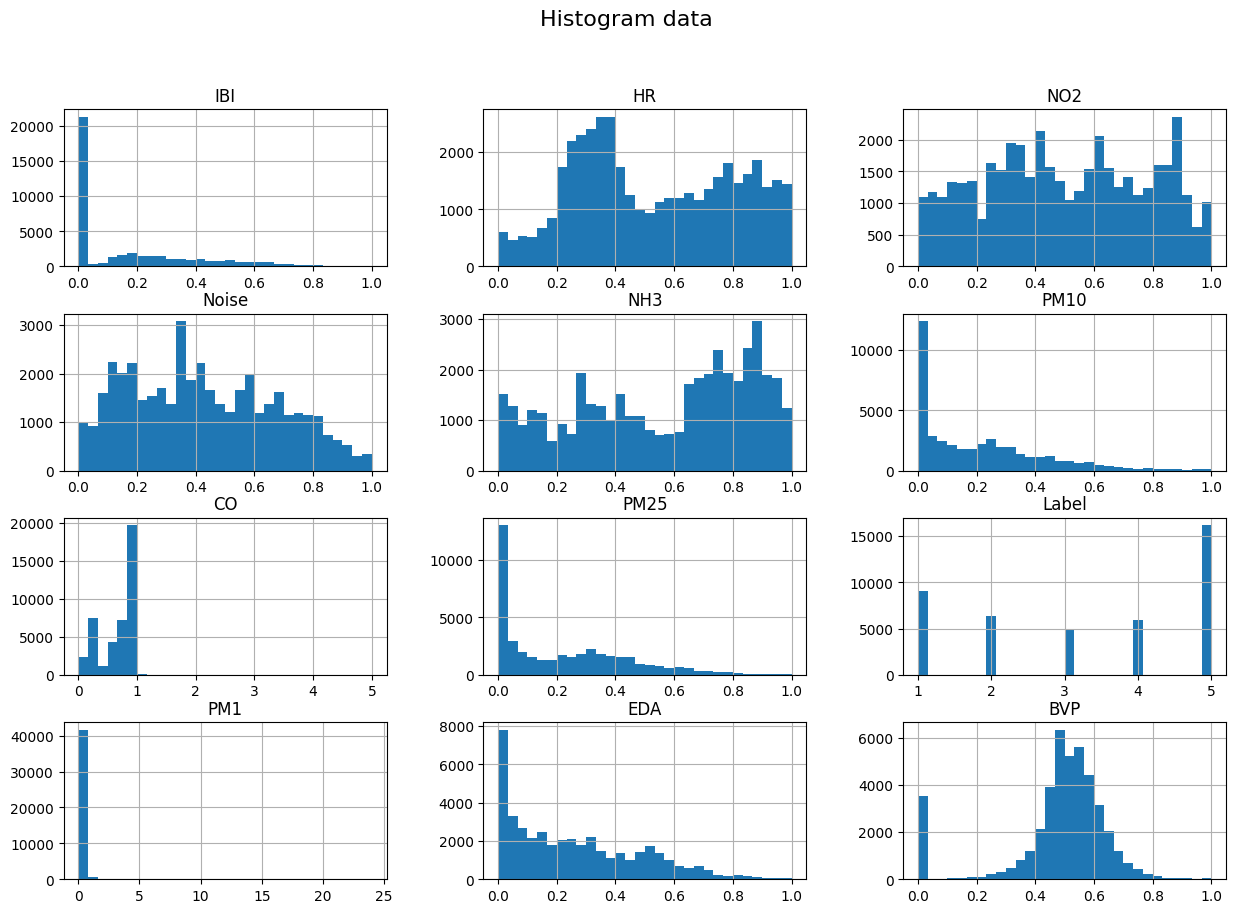

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [10]:
df.shape

(42436, 12)

C:\Users\Ryan\AppData\Local\Temp\ipykernel_12584\3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


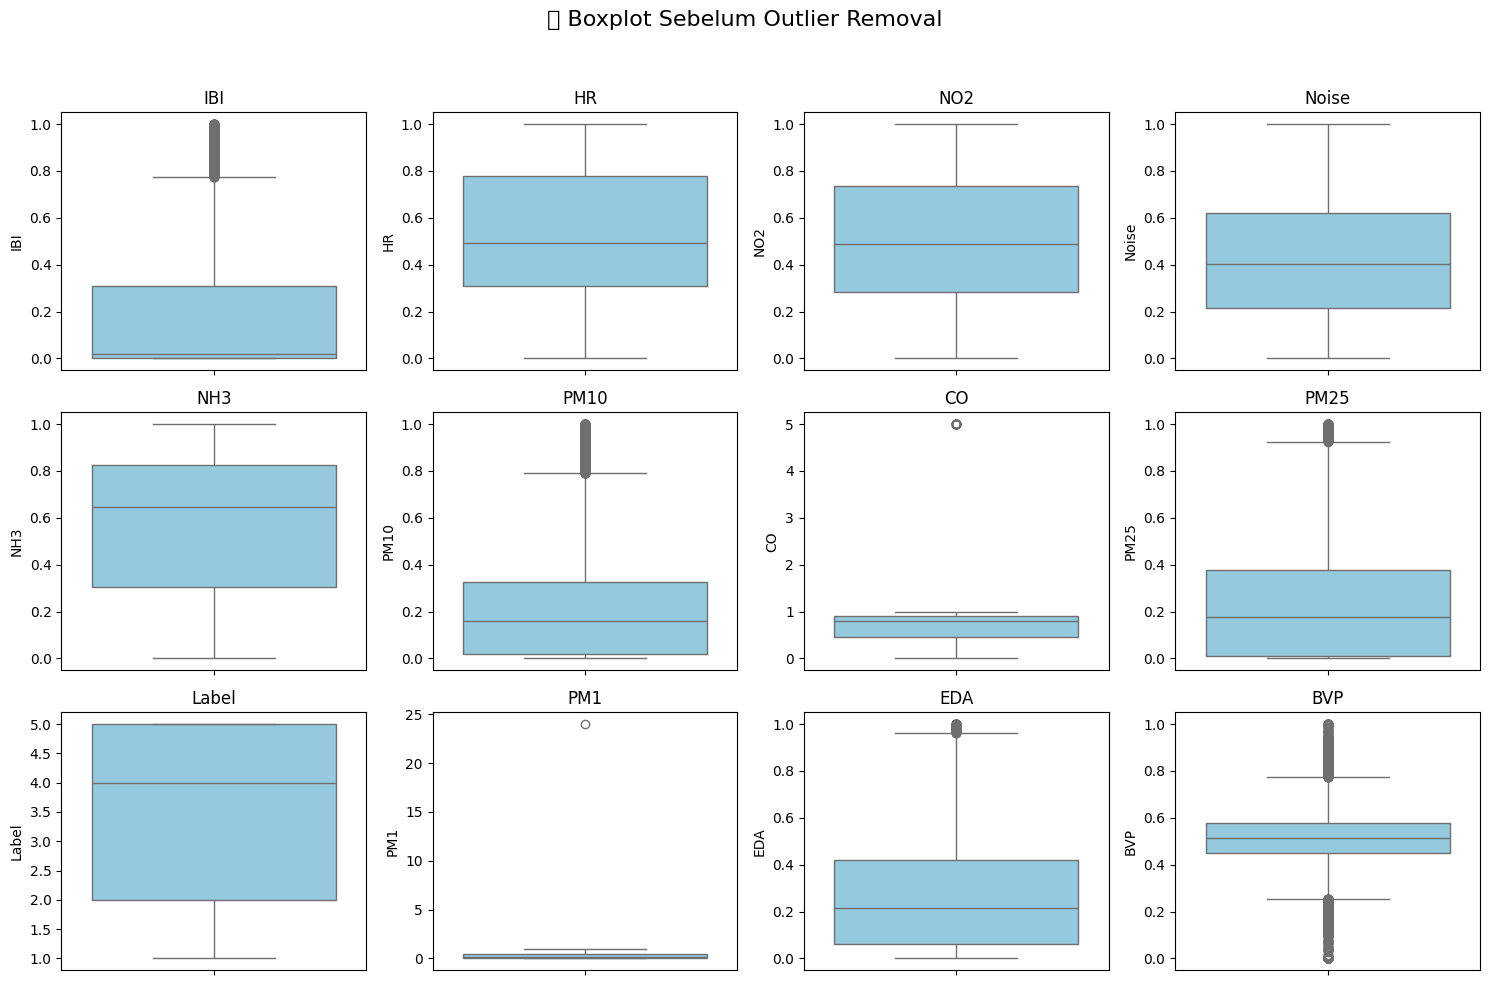

In [11]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [12]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [13]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


C:\Users\Ryan\AppData\Local\Temp\ipykernel_12584\230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


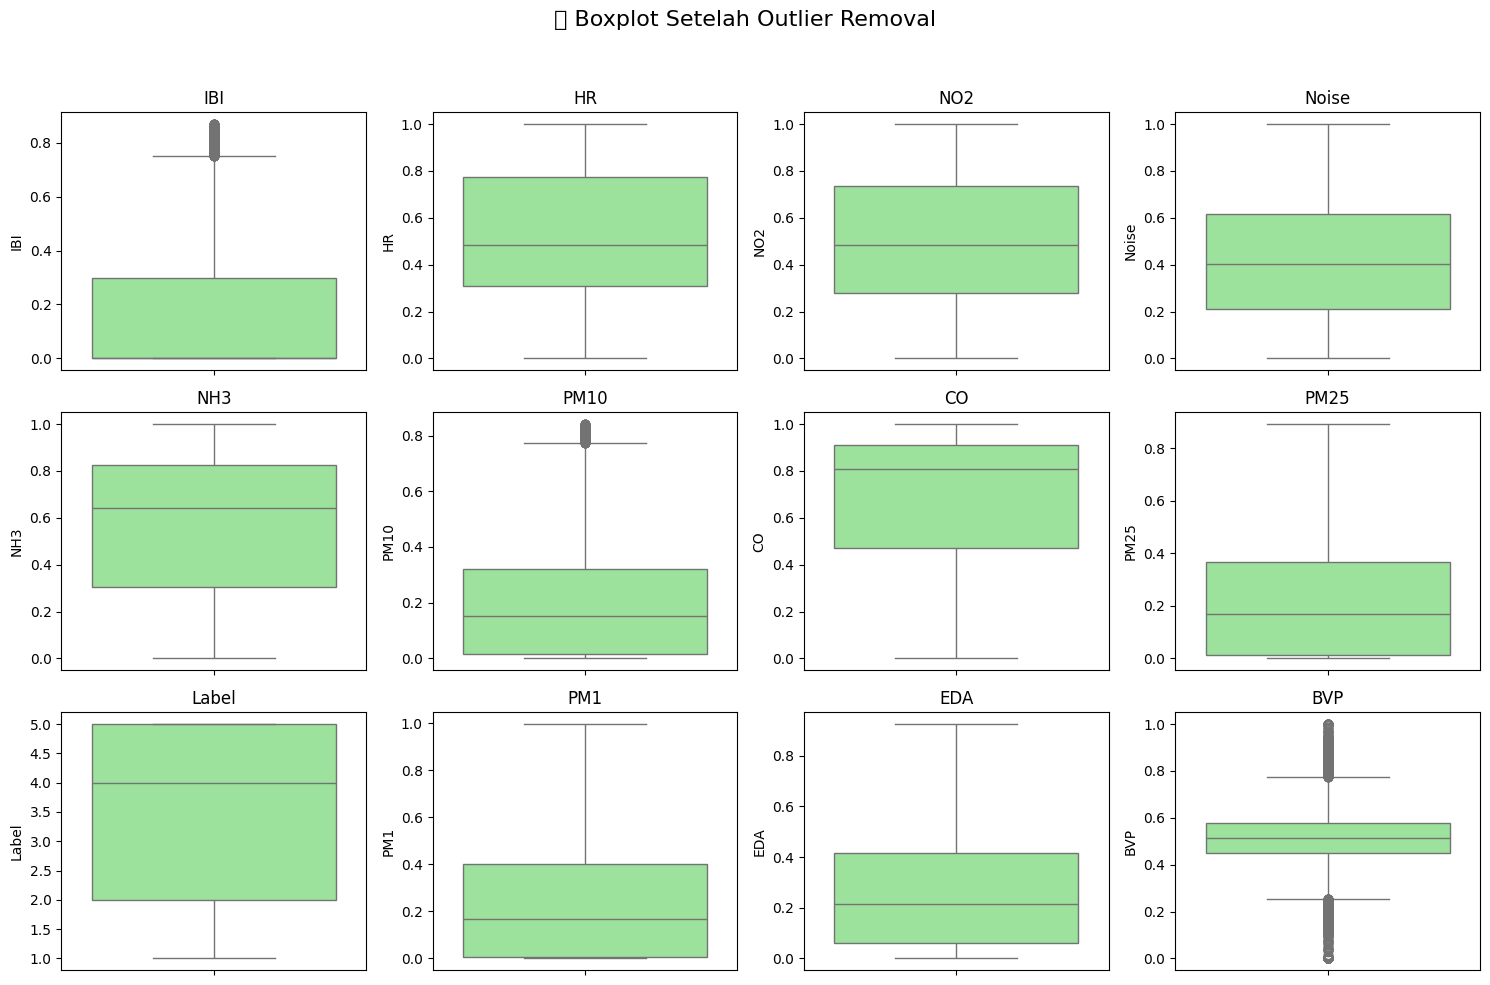

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


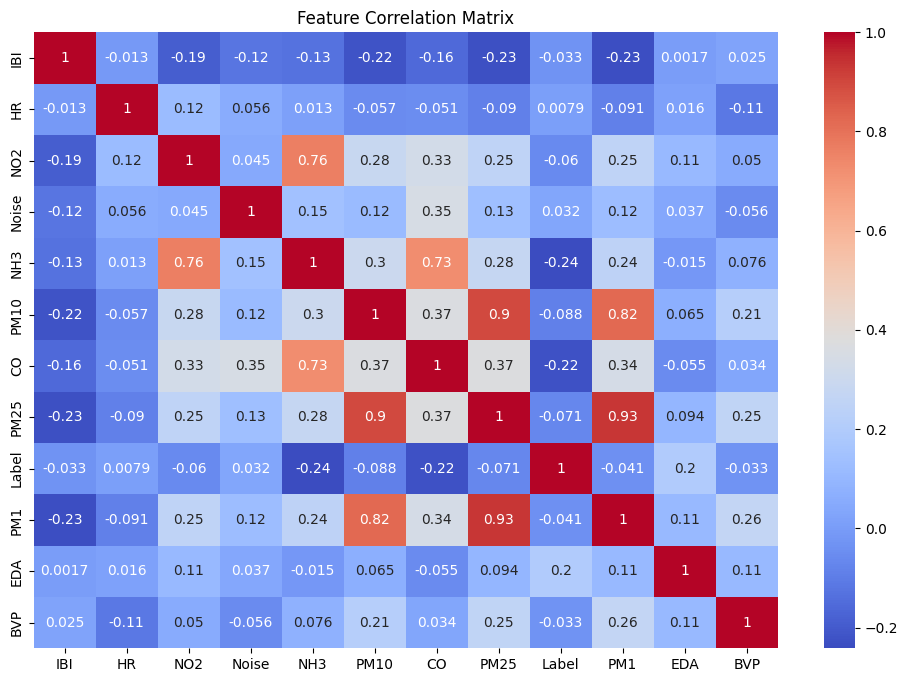

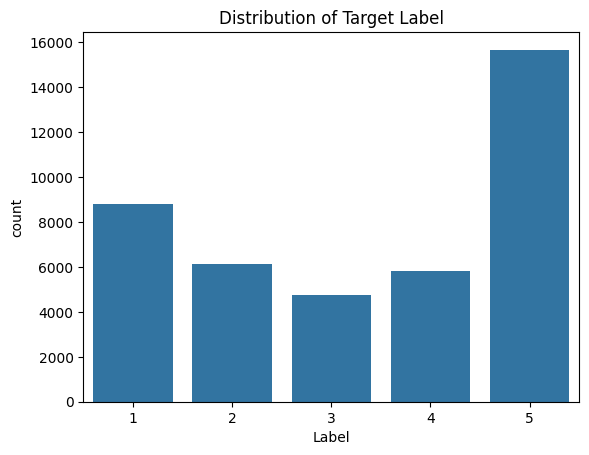

In [15]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [16]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [17]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


## Prepocessing

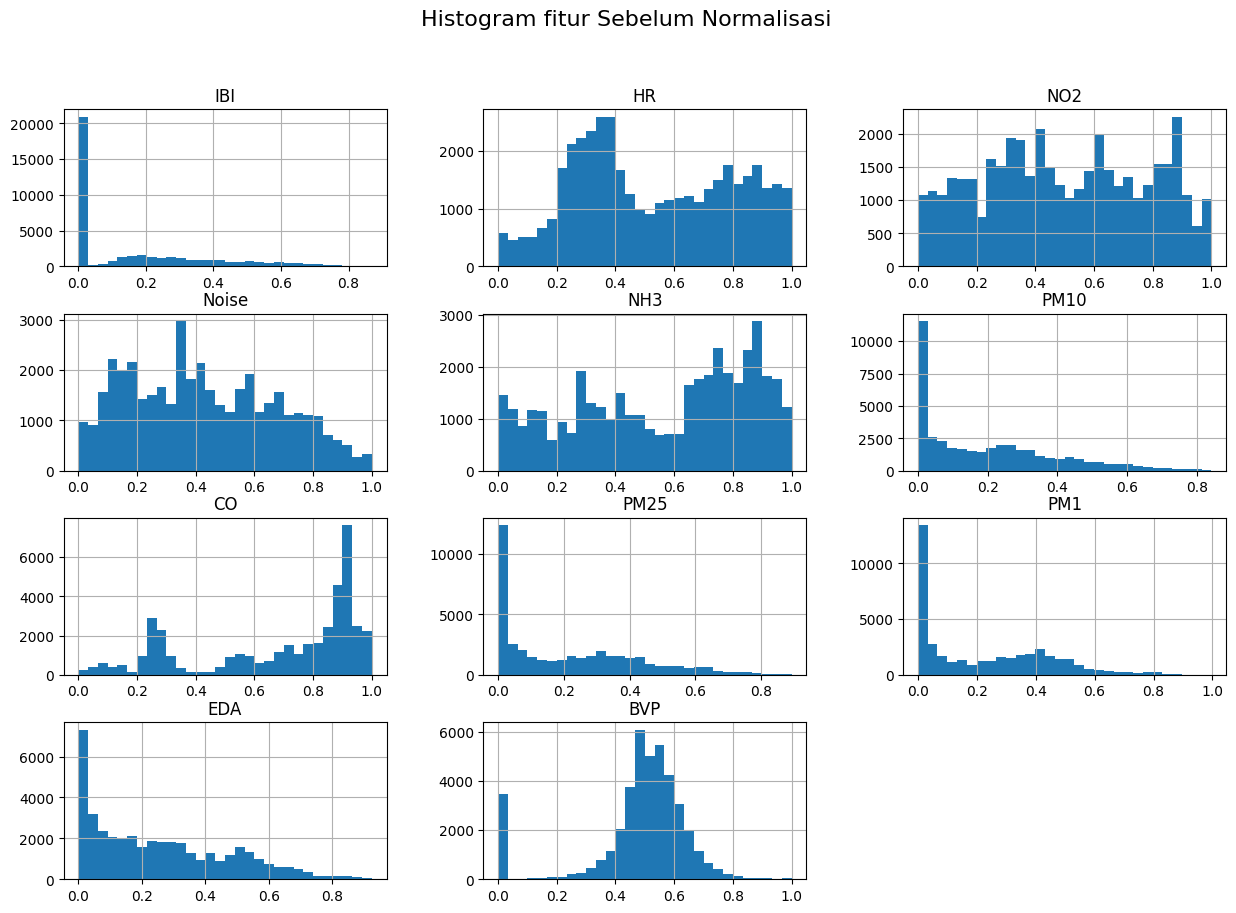

In [18]:
# Histogram sebelum normalisasi
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (32951, 11)
Data Test after normalisation = (8238, 11)


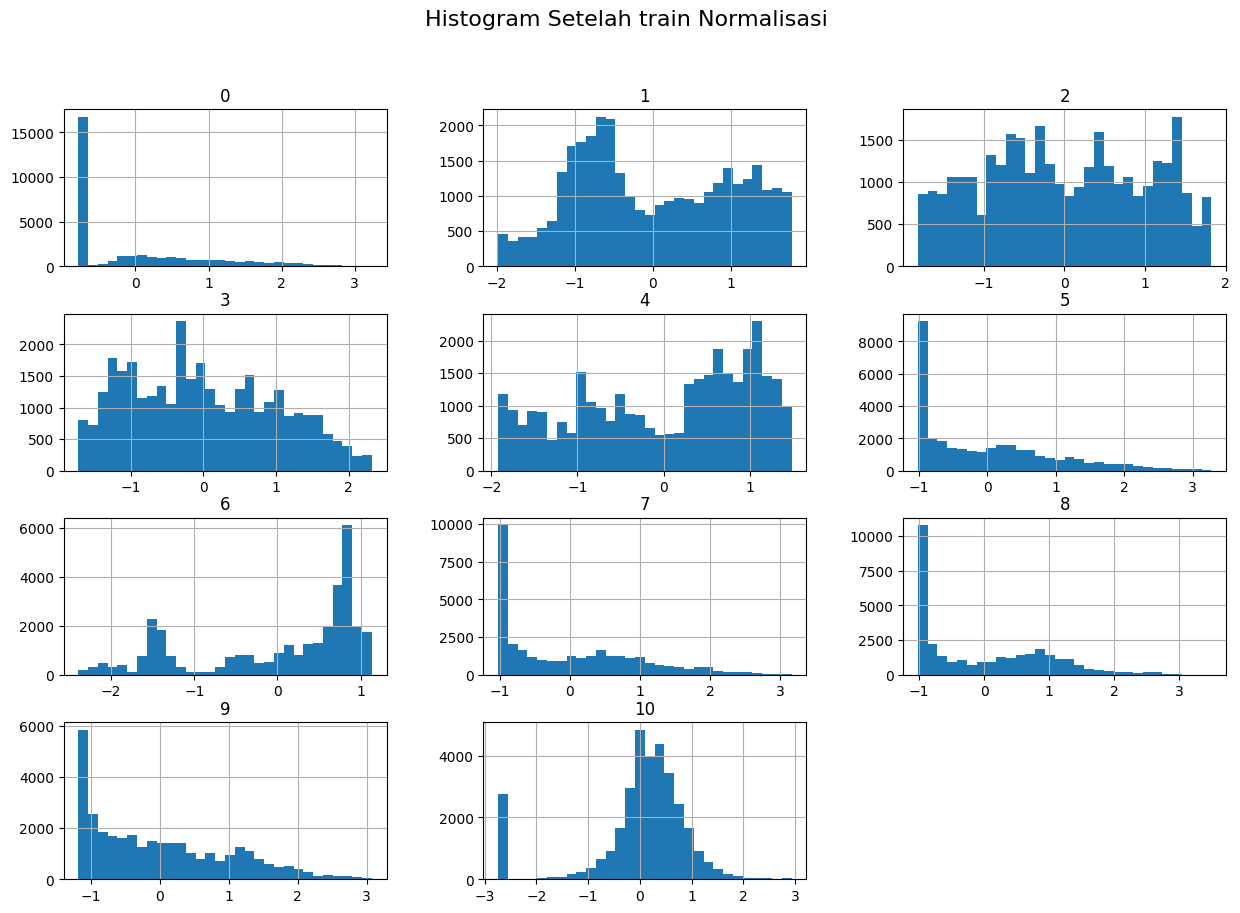

In [21]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

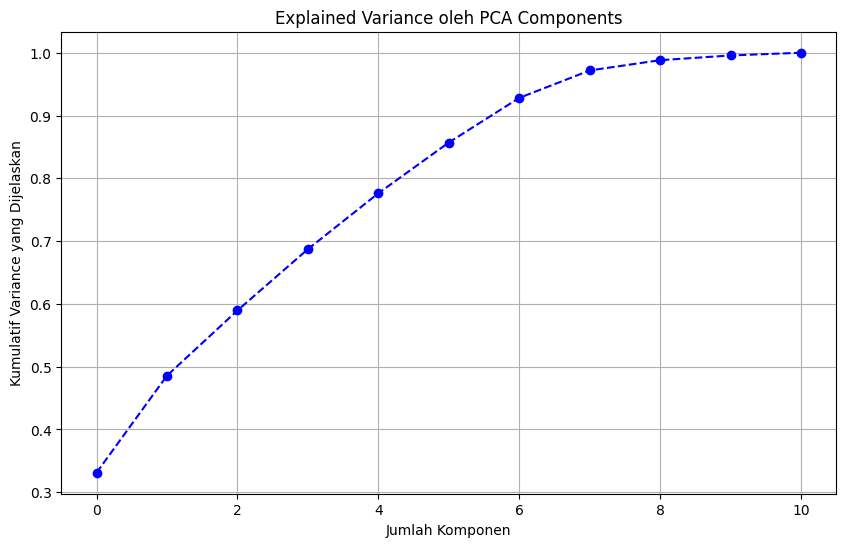

In [22]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [23]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3311 variance terjelaskan
Komponen ke-2: 0.4856 variance terjelaskan
Komponen ke-3: 0.5895 variance terjelaskan
Komponen ke-4: 0.6871 variance terjelaskan
Komponen ke-5: 0.7761 variance terjelaskan
Komponen ke-6: 0.8569 variance terjelaskan
Komponen ke-7: 0.9280 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9881 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [ ]:
# from sklearn.decomposition import PCA

# # Inisialisasi PCA dengan 7 komponen
# pca = PCA(n_components=7)

# # Fit hanya di data train
# X_train_pca = pca.fit_transform(X_train_scaled)

# # Transform data test pakai PCA yang sudah fit dari train
# X_test_pca = pca.transform(X_test_scaled)

# print("Shape train PCA:", X_train_pca.shape)
# print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)


## Training Data

In [25]:
# import pandas as pd

# # Base (data sebelum normalisasi dan PCA)
# print("\n=== X_train (original) ===")
# print(pd.DataFrame(X_train).head())
# print("Shape:", X_train.shape)

# print("\n=== X_test (original) ===")
# print(pd.DataFrame(X_test).head())
# print("Shape:", X_test.shape)

# print("\n=== y_train ===")
# print(y_train.head())
# print("Shape:", y_train.shape)

# print("\n=== y_test ===")
# print(y_test.head())
# print("Shape:", y_test.shape)

# # Normalisasi
# print("\n=== X_train_pca (StandardScaler) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)
# # print("\n=== X_train_scaled (StandardScaler) ===")
# # print(pd.DataFrame(X_train_scaled).head())
# # print("Shape:", X_train_scaled.shape)

# print("\n=== X_test_pca (StandardScaler) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)
# # print("\n=== X_test_scaled (StandardScaler) ===")
# # print(pd.DataFrame(X_test_scaled).head())
# # print("Shape:", X_test_scaled.shape)

# # PCA
# print("\n=== X_train_pca (7 komponen) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)

# print("\n=== X_test_pca (7 komponen) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)


In [26]:
X_train

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,PM1,EDA,BVP
12977,0.517128,0.284415,0.246611,0.872229,0.646159,0.345026,0.898817,0.611319,0.791895,0.201958,0.428074
36584,0.000000,0.357652,0.821985,0.175064,0.959080,0.430619,0.895364,0.298246,0.386150,0.008619,0.868089
31525,0.243961,0.635042,0.419748,0.063829,0.327104,0.072655,0.258582,0.072655,0.000000,0.210157,0.503498
18438,0.319215,0.717958,0.208520,0.736786,0.664228,0.075351,0.937006,0.074013,0.072675,0.675412,0.514364
3484,0.000000,0.481332,0.370370,0.517397,0.299558,0.239023,0.768162,0.314064,0.351411,0.393351,0.467247
...,...,...,...,...,...,...,...,...,...,...,...
6494,0.113168,0.784079,0.793854,0.802013,0.783663,0.442895,0.990080,0.619560,0.625204,0.290364,0.519821
11686,0.000000,0.610305,0.255343,0.239129,0.662175,0.322216,0.897887,0.556767,0.715843,0.569527,0.568792
39345,0.487289,0.196632,0.048863,0.368528,0.043536,0.152866,0.237665,0.270849,0.281952,0.102710,0.428210
871,0.000000,0.840330,0.673244,0.641620,0.571058,0.051921,0.513374,0.051921,0.034614,0.000000,0.000000


In [27]:
X_train_scaled

array([[ 1.60944437, -0.91542406, -0.91739019, ...,  2.57032785,
        -0.25103241, -0.31225549],
       [-0.78335489, -0.6396951 ,  1.17509062, ...,  0.73212195,
        -1.1410928 ,  2.18308467],
       [ 0.34547401,  0.40464683, -0.28773589, ..., -1.01730581,
        -0.21329076,  0.11547779],
       ...,
       [ 1.47137717, -1.24591447, -1.63654354, ...,  0.26006124,
        -0.70793475, -0.31148449],
       [-0.78335489,  1.17753193,  0.6341612 , ..., -0.86049055,
        -1.1807717 , -2.73987842],
       [-0.78335489, -0.90911803,  1.22850053, ...,  1.80637601,
        -1.05999396,  1.17592438]])

In [29]:
print("Unique y_train:", np.unique(y_train))
print("Unique y_test :", np.unique(y_test))


Unique y_train: [1 2 3 4 5]
Unique y_test : [1 2 3 4 5]


## Not Normalized


🔹 Training ANN (Basic + Adam + Dropout)...
Epoch 1/50
824/824 [==============================] - 2s 2ms/step - loss: 1.3731 - accuracy: 0.4422 - val_loss: 1.2235 - val_accuracy: 0.5154
Epoch 2/50
824/824 [==============================] - 1s 1ms/step - loss: 1.2276 - accuracy: 0.5107 - val_loss: 1.1349 - val_accuracy: 0.5571
Epoch 3/50
824/824 [==============================] - 1s 1ms/step - loss: 1.1683 - accuracy: 0.5429 - val_loss: 1.0771 - val_accuracy: 0.5860
Epoch 4/50
824/824 [==============================] - 1s 1ms/step - loss: 1.1252 - accuracy: 0.5655 - val_loss: 1.0421 - val_accuracy: 0.5966
Epoch 5/50
824/824 [==============================] - 1s 1ms/step - loss: 1.0953 - accuracy: 0.5797 - val_loss: 1.0232 - val_accuracy: 0.6011
Epoch 6/50
824/824 [==============================] - 1s 1ms/step - loss: 1.0739 - accuracy: 0.5871 - val_loss: 0.9871 - val_accuracy: 0.6280
Epoch 7/50
824/824 [==============================] - 1s 1ms/step - loss: 1.0585 - accuracy: 0.5943 - va

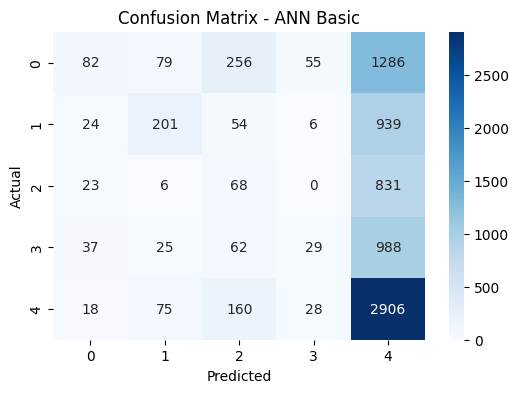


📊 Hasil Model ANN:
           Accuracy  Precision    Recall  F1-Score
ANN Basic  0.398883   0.348721  0.244276  0.208511


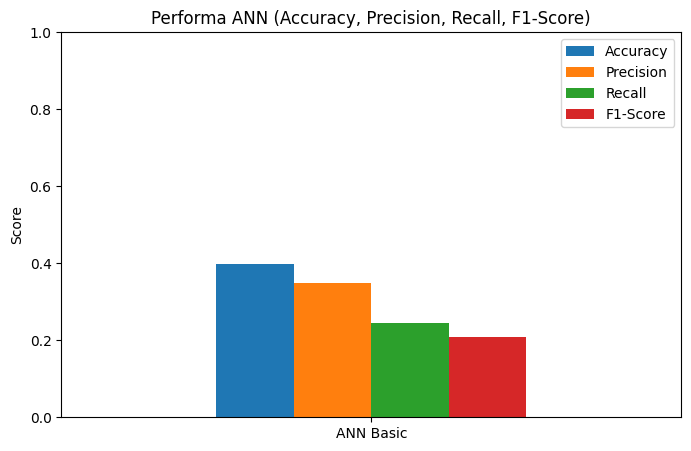

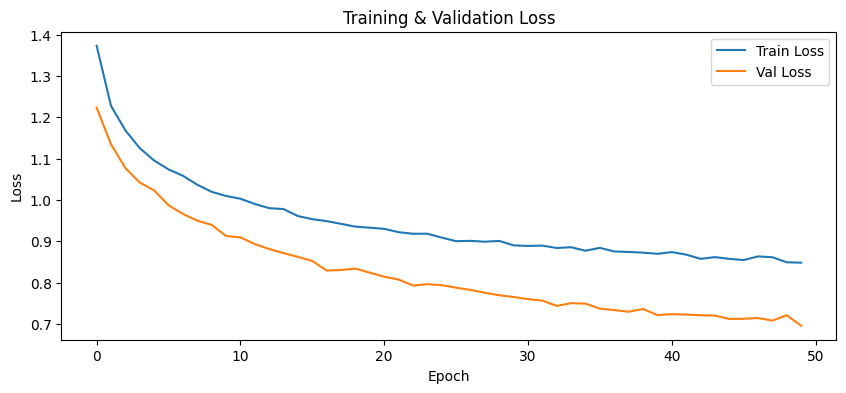

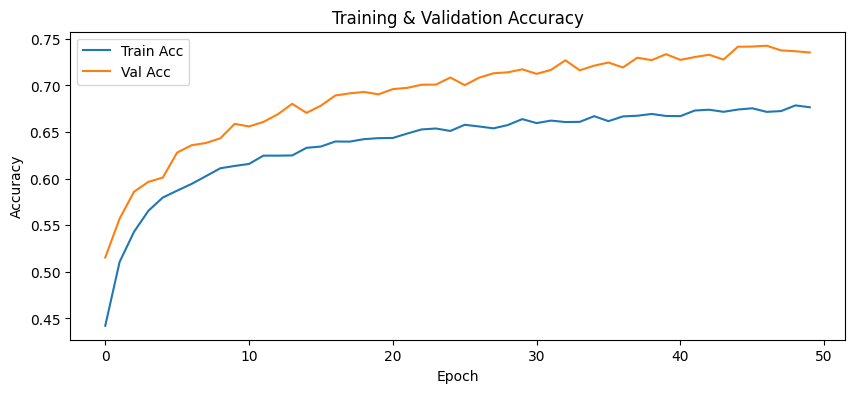

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train.shape[1], num_classes)
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# ✅ Print nilai numerik dengan 4 desimal
print("\n=== 📊 METRIK PERFORMA ANN ===")
print(f"Accuracy : {results['ANN Basic']['Accuracy']:.4f}")
print(f"Precision: {results['ANN Basic']['Precision']:.4f}")
print(f"Recall   : {results['ANN Basic']['Recall']:.4f}")
print(f"F1-Score : {results['ANN Basic']['F1-Score']:.4f}")

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Normalized

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train_scaled.shape[1], num_classes)
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## N = 7

In [ ]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train_pca.shape[1], num_classes)
history = model.fit(
    X_train_pca, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## N = 6

In [ ]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train_pca.shape[1], num_classes)
history = model.fit(
    X_train_pca, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## N = 5

In [ ]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train_pca.shape[1], num_classes)
history = model.fit(
    X_train_pca, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## N = 4

In [ ]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=4)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train_pca.shape[1], num_classes)
history = model.fit(
    X_train_pca, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## N = 3

In [ ]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=3)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train_pca.shape[1], num_classes)
history = model.fit(
    X_train_pca, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## N = 2

In [ ]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=2)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # === PERBAIKAN LABEL ===
# # Geser label dari range 1–5 menjadi 0–4
# y_train = y_train - 1
# y_test  = y_test  - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# ======================
# 1️⃣ Konversi Label ke One-Hot
# ======================
num_classes = 5  # output 5 kelas
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test, num_classes=num_classes)

# ======================
# 2️⃣ Fungsi untuk Membangun Model ANN
# ======================
def build_ann(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))  # 5 kelas output
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ======================
# 3️⃣ Latih dan Evaluasi ANN
# ======================
results = {}
print("\n🔹 Training ANN (Basic + Adam + Dropout)...")

model = build_ann(X_train_pca.shape[1], num_classes)
history = model.fit(
    X_train_pca, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Prediksi
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
results["ANN Basic"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["macro avg"]["precision"],
    "Recall": report["macro avg"]["recall"],
    "F1-Score": report["macro avg"]["f1-score"]
}

# Laporan lengkap
print("\nClassification Report (ANN Basic):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ANN Basic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 4️⃣ Visualisasi Performa
# ======================
df_results = pd.DataFrame(results).T
print("\n📊 Hasil Model ANN:")
print(df_results)

df_results.plot(kind="bar", figsize=(8,5))
plt.title("Performa ANN (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# ======================
# 5️⃣ Visualisasi Loss & Accuracy per Epoch
# ======================
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()